In [ ]:
import requests  # Importing the requests library to make HTTP requests
from bs4 import BeautifulSoup as bs  # Importing BeautifulSoup to parse HTML documents
import pandas as pd  # Importing Pandas library to manipulate data
from statistics import mean  # Importing mean function from statistics module
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
apartment_info_palermo_df = pd.read_csv('Palermo_data2.csv') 

In [ ]:
apartment_info_palermo_df.price = pd.to_numeric(apartment_info_palermo_df.price, errors='coerce')

df = apartment_info_palermo_df.sort_values(by=['price'])
df

,location,latitude,longitude,bedrooms,bathrooms,antiquity,expenses,price,currency,covered_area,uncovered_area,url
21,humboldt 2400,-34.578686,-58.428530,Monoambiente,1.0,13.0,22000.0,300.0,USD,33.0,NaN,https://www.argenprop.com/departamento-en-alqu...
147,"beruti 4500, palermo",-34.584328,-58.413730,1,1.0,10.0,30000.0,420.0,USD,39.0,6.0,https://www.argenprop.com/departamento-en-alqu...
130,guemes 4500,-34.688847,-58.380344,Monoambiente,NaN,NaN,NaN,500.0,USD,30.0,NaN,https://www.argenprop.com/departamento-en-alqu...
67,thames 1800,-34.586490,-58.428930,Monoambiente,NaN,30.0,10000.0,500.0,USD,44.0,NaN,https://www.argenprop.com/departamento-en-alqu...
186,estado de palestina al 1100,-34.596250,-58.424430,1,1.0,NaN,NaN,500.0,USD,30.0,NaN,https://www.argenprop.com/departamento-en-alqu...
...,...,...,...,...,...,...,...,...,...,...,...,...
151,juan maria gutierrez 3900,-34.580154,-58.415840,2,1.0,45.0,34500.0,360000.0,$,95.0,NaN,https://www.argenprop.com/departamento-en-alqu...
39,"malabia 2400, piso 18",-34.584675,-58.417645,3,3.0,30.0,65000.0,380000.0,$,115.0,11.0,https://www.argenprop.com/departamento-en-alqu...
71,"av scalabrini ortiz 3000, piso 27",-34.581642,-58.411003,4,3.0,NaN,96000.0,599000.0,$,180.0,NaN,https://www.argenprop.com/departamento-en-alqu...
191,malabia al 2200,-34.586800,-58.420660,3,4.0,NaN,NaN,600000.0,$,135.0,NaN,https://www.argenprop.com/departamento-en-alqu...


Number of apartments in Dollar and ARS

In [ ]:
print('Deptos en alquiler en Palermo')
dato = apartment_info_palermo_df['currency'].value_counts()
for i in range(2):
  print(dato.index[i], round(dato.values[i]/len(apartment_info_palermo_df)*100), '%')

Deptos en alquiler en Palermo
USD 71 %
$ 28 %


##USD/ARS


In [ ]:
url = 'https://dolarhoy.com/'  # The URL of the webpage to scrape
search = requests.get(url, verify=True, headers={"User-Agent": 'Mozilla/5.0'})  # Making a GET request to the URL
print(f'Status Code: {search.status_code}')  # Printing the status code of the request
search_parseada = bs(search.content, 'html.parser')  # Parsing the HTML content of the response using BeautifulSoup

Status Code: 200


In [ ]:
nombres = search_parseada.find_all(name='a', attrs={'class': 'title'})[1:]  # Finding all names

dolares = search_parseada.find_all(name='div', attrs={'class': 'val'})[2:]  # Finding all values

dolar_fecha = search_parseada.find(name='div', attrs={'class': 'tile update'}).text  # Finding the update time

In [ ]:
titulos = []

for i in range(2*len(nombres)-1):
  titulos.append(nombres[int(i/2)].contents[0])

In [ ]:
for i in range(len(dolares)):
  if i % 2 == 0:
    print(titulos[i], '\nCompra:', dolares[i].contents[0])
  else:
    print('Venta:', dolares[i].contents[0], '\n')
print('')
print(dolar_fecha)

Dólar blue 
Compra: $427.00
Venta: $432.00 

Dólar oficial promedio 
Compra: $217.37
Venta: $224.88 

Dólar Bolsa 
Compra: $419.72
Venta: $421.43 

Contado con liqui 
Compra: $429.79
Venta: $437.34 

Dólar cripto 
Compra: $422.00
Venta: $429.00 

Dólar Solidario 
Compra: $370.42

Actualizado el 21/04/23 02:27 AM


In [ ]:
dolar_promedio = mean([float(dolares[0].contents[0][1:]), float(dolares[1].contents[0][1:])])
print(f'Blue Promedio: ${dolar_promedio}')
print(type(dolar_promedio)) 

Blue Promedio: $429.5
<class 'float'>


##USD to ARS


In [ ]:
dolar_promedio

429.5

In [ ]:
df['price'] = np.where(df.currency == 'USD', df.price*dolar_promedio, df.price)
df['currency'] = '$'

Text(0.5, 1.0, 'Precio en Pesos de Deptos en Palermo')

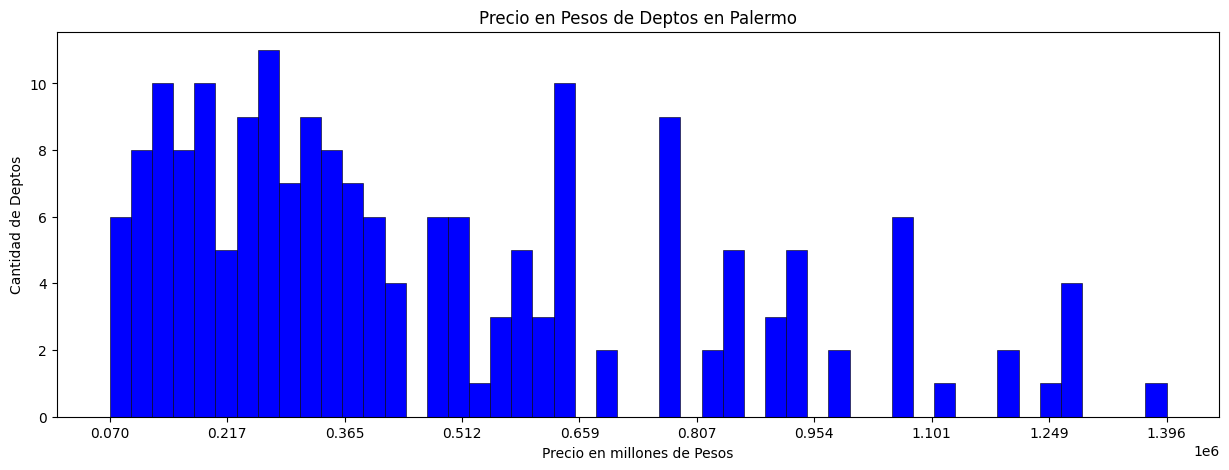

In [ ]:
price_pesos = np.sort(df.price.values)[:-15]
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(price_pesos, bins=50 , facecolor='blue', edgecolor='black', linewidth=0.4)
plt.xlabel('Precio en millones de Pesos')
plt.xticks(np.linspace(min(price_pesos), max(price_pesos), 10))
plt.ylabel('Cantidad de Deptos')
plt.title('Precio en Pesos de Deptos en Palermo')

#Price per $m^2$ (covered area)

In [ ]:
df['price_m2'] = df.price / df.covered_area

In [ ]:
df.sort_values(by=['price_m2'])

,location,latitude,longitude,bedrooms,bathrooms,antiquity,expenses,price,currency,covered_area,uncovered_area,url,price_m2
146,uriarte 2400,-34.582428,-58.424942,3,3.0,NaN,NaN,200000.0,$,115.0,34.0,https://www.argenprop.com/departamento-en-alqu...,1739.130435
109,"bulnes 1600, piso 5to",-34.592910,-58.416283,1,1.0,NaN,17974.0,83000.0,$,36.0,NaN,https://www.argenprop.com/departamento-en-alqu...,2305.555556
194,cabrera 2900,-34.597020,-58.407410,Monoambiente,1.0,40.0,11500.0,80000.0,$,33.0,NaN,https://www.argenprop.com/departamento-en-alqu...,2424.242424
172,"gral guemes 3700, piso 5",-34.587650,-58.415382,1,1.0,40.0,22000.0,85000.0,$,35.0,NaN,https://www.argenprop.com/departamento-en-alqu...,2428.571429
74,av. las heras 3700,-34.581814,-58.411400,2,2.0,70.0,50000.0,199000.0,$,80.0,NaN,https://www.argenprop.com/departamento-en-alqu...,2487.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,concepcion arenal al 2300,-34.573980,-58.436960,2,1.0,30.0,14000.0,150000.0,$,NaN,6.0,https://www.argenprop.com/departamento-en-alqu...,NaN
116,guise 1900,-34.589870,-58.412240,1,1.0,36.0,NaN,185000.0,$,NaN,NaN,https://www.argenprop.com/departamento-en-alqu...,NaN
136,alquiler departamento 1 dormitorio palermo con...,-34.577045,-58.422913,1,1.0,10.0,22000.0,225000.0,$,NaN,NaN,https://www.argenprop.com/departamento-en-alqu...,NaN
174,nicaragua al 4300,-34.590195,-58.422830,2,1.0,60.0,NaN,250000.0,$,NaN,NaN,https://www.argenprop.com/departamento-en-alqu...,NaN


Text(0.5, 1.0, 'Precio por m2 de Deptos en Palermo')

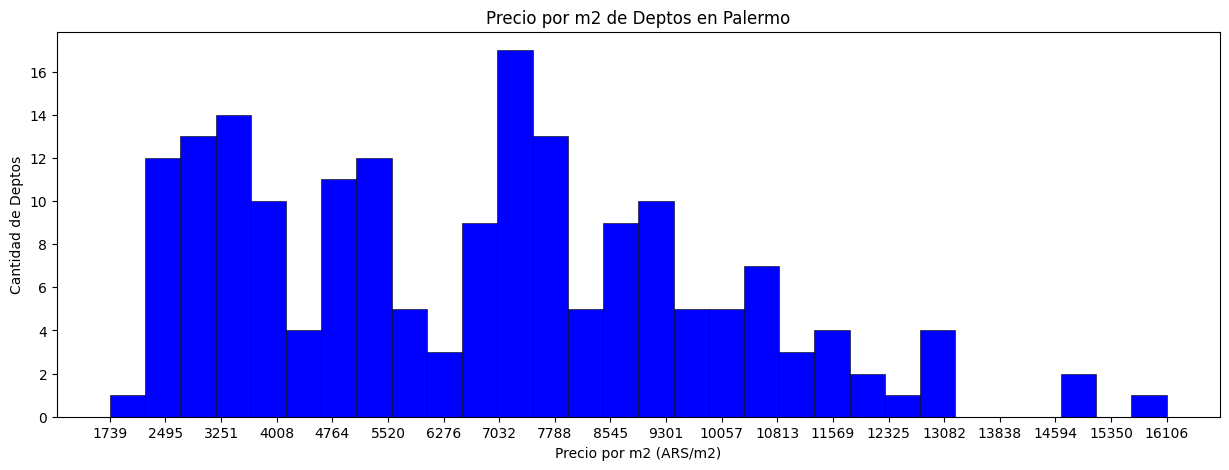

In [ ]:
price_m2 = np.sort(df.price_m2.values)
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(price_m2, bins=30 , facecolor='blue', edgecolor='black', linewidth=0.4)
plt.xlabel('Precio por m2 (ARS/m2)')
plt.xticks(np.linspace(min(price_m2), max(price_m2), 20))
plt.ylabel('Cantidad de Deptos')
plt.title('Precio por m2 de Deptos en Palermo')

#Only in ARS


In [ ]:
df_solo_pesos = apartment_info_palermo_df[apartment_info_palermo_df['currency']=='$'].reset_index(drop= True)
df_solo_pesos

,location,latitude,longitude,bedrooms,bathrooms,antiquity,expenses,price,currency,covered_area,uncovered_area,url
0,"serrano 1300, piso 6",-34.603683,-58.381557,2,1.0,40.0,22600.0,170000.0,$,57.0,NaN,https://www.argenprop.com/departamento-en-alqu...
1,republica arabe siria 3000,-34.580875,-58.413803,2,1.0,55.0,35000.0,165000.0,$,60.0,NaN,https://www.argenprop.com/departamento-en-alqu...
2,"gral manuel n savio 200, piso 1",-34.574146,-58.434830,2,1.0,NaN,30000.0,140000.0,$,50.0,9.6,https://www.argenprop.com/departamento-en-alqu...
3,scalabrini ortiz raul 2200,-34.587040,-58.419720,1,NaN,35.0,8800.0,125000.0,$,34.0,NaN,https://www.argenprop.com/departamento-en-alqu...
4,"av alvarez thomas 1100, piso 2",-34.578470,-58.457710,Monoambiente,1.0,5.0,14000.0,120000.0,$,31.0,4.0,https://www.argenprop.com/departamento-en-alqu...


In [ ]:
df_solo_pesos['price_m2'] = df_solo_pesos.price / df_solo_pesos.covered_area

Text(0.5, 1.0, 'Precio por m2 de Deptos en Palermo')

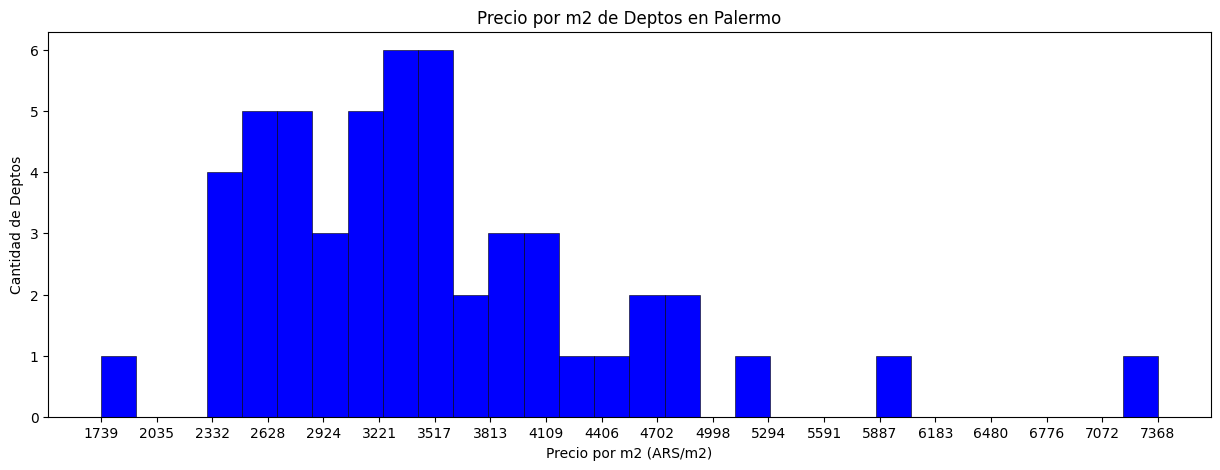

In [ ]:
price_m2 = np.sort(df_solo_pesos.price_m2.values)
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(price_m2, bins=30 , facecolor='blue', edgecolor='black', linewidth=0.4)
plt.xlabel('Precio por m2 (ARS/m2)')
plt.xticks(np.linspace(min(price_m2), max(price_m2), 20))
plt.ylabel('Cantidad de Deptos')
plt.title('Precio por m2 de Deptos en Palermo')

In [ ]:
df_ordenado = df_solo_pesos.sort_values(by=['price_m2']).reset_index(drop= True)

In [ ]:
len(df_ordenado)

57

Text(0.5, 1.0, 'Precio en Pesos de Deptos en Palermo')

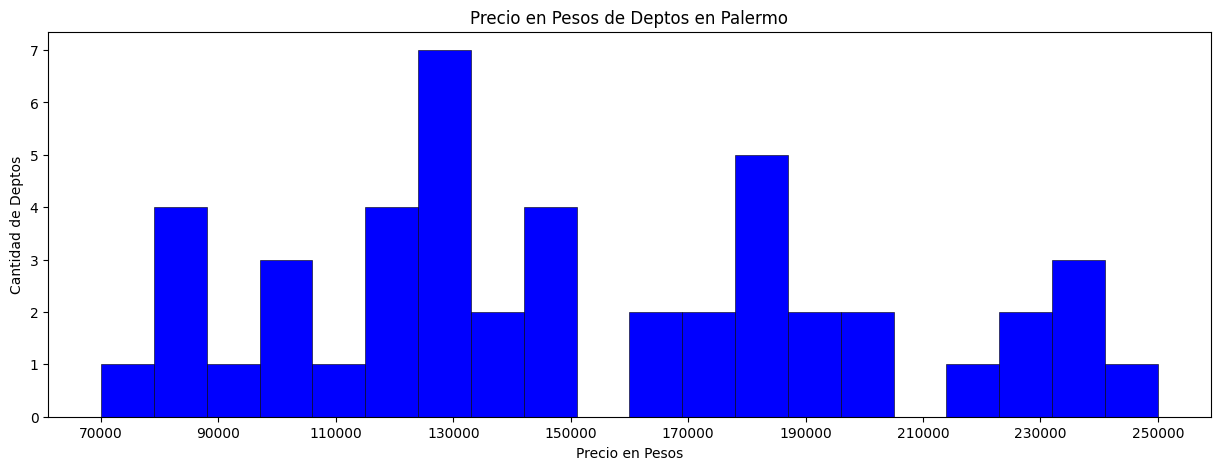

In [ ]:
price_pesos = np.sort(df_solo_pesos.price.values)[:-10]
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(price_pesos, bins=20 , facecolor='blue', edgecolor='black', linewidth=0.4)
plt.xlabel('Precio en Pesos')
plt.xticks(np.linspace(min(price_pesos), max(price_pesos), 10))
plt.ylabel('Cantidad de Deptos')
plt.title('Precio en Pesos de Deptos en Palermo')